In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'limit': 10
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    json_ = response.json()
    with open('data.json', 'w') as f:
        json.dump(json_, f)
    #data = json.loads(response.text)
    #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [2]:
import json

In [3]:
import json
 
with open("data.json", "r") as file:
    data = json.load(file)
 
    print("Data retrieved")

Data retrieved


In [4]:
list_ = []
for i in range(len(data['data'])):
    cryp_dict = {}
    cryp_dict['symbol'] = data['data'][i]['symbol']
    cryp_dict['max_supply'] = data['data'][i]['max_supply']
    cryp_dict['circulating_supply'] = data['data'][i]['circulating_supply']
    cryp_dict['total_supply'] = data['data'][i]['total_supply']
    cryp_dict['market_cap'] = data['data'][i]['quote']['USD']['market_cap']
    cryp_dict['price'] = data['data'][i]['quote']['USD']['price']
    cryp_dict['volume_24h'] = data['data'][i]['quote']['USD']['volume_24h']
    cryp_dict['percent_change_24h'] = data['data'][i]['quote']['USD']['percent_change_24h']
    cryp_dict['percent_change_7d'] = data['data'][i]['quote']['USD']['percent_change_7d']
    cryp_dict['percent_change_30d'] = data['data'][i]['quote']['USD']['percent_change_30d']
    cryp_dict['percent_change_60d'] = data['data'][i]['quote']['USD']['percent_change_60d']
    list_.append(cryp_dict)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
#list_[0]['quote']['USD']

In [7]:
df = pd.DataFrame(list_)

In [8]:
df.head()

,symbol,max_supply,circulating_supply,total_supply,market_cap,price,volume_24h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d
0,BTC,21000000.0,1.907432e+07,1.907432e+07,3.798245e+11,19912.869027,2.852464e+10,-4.742698,-8.980066,-32.259632,-50.024363
1,ETH,NaN,1.212684e+08,1.212684e+08,1.276430e+11,1052.566402,1.502115e+10,-6.663882,-11.642697,-47.350612,-64.501546
2,USDT,NaN,6.698103e+10,6.861062e+10,6.691003e+10,0.998940,4.621269e+10,-0.013616,0.014949,-0.008223,-0.130042
3,USDC,NaN,5.594389e+10,5.594389e+10,5.595489e+10,1.000197,4.542419e+09,0.004894,0.001172,0.009497,-0.004047
4,BNB,165116760.0,1.632770e+08,1.632770e+08,3.498083e+10,214.242287,1.067915e+09,-2.975717,-4.124827,-34.283193,-47.282218


<AxesSubplot:xlabel='symbol', ylabel='market_cap'>

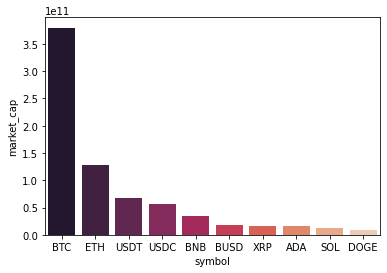

In [9]:
sns.barplot(x="symbol", y="market_cap", palette="rocket", data=df)

<AxesSubplot:xlabel='symbol', ylabel='circulating_supply'>

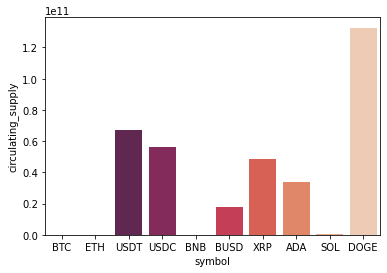

In [10]:
sns.barplot(x="symbol", y="circulating_supply", palette="rocket", data=df)

In [11]:
from datetime import datetime,timedelta

print(datetime.now().strftime('%Y-%m-%d'))
df['date'] = datetime.now().strftime('%Y-%m-%d')
df['date_24h'] = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
df['date_30d'] = (datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d')
df['date_60d'] = (datetime.now() - timedelta(days=60)).strftime('%Y-%m-%d')

2022-06-22


In [12]:
df.head()

,symbol,max_supply,circulating_supply,total_supply,market_cap,price,volume_24h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,date,date_24h,date_30d,date_60d
0,BTC,21000000.0,1.907432e+07,1.907432e+07,3.798245e+11,19912.869027,2.852464e+10,-4.742698,-8.980066,-32.259632,-50.024363,2022-06-22,2022-06-21,2022-05-23,2022-04-23
1,ETH,NaN,1.212684e+08,1.212684e+08,1.276430e+11,1052.566402,1.502115e+10,-6.663882,-11.642697,-47.350612,-64.501546,2022-06-22,2022-06-21,2022-05-23,2022-04-23
2,USDT,NaN,6.698103e+10,6.861062e+10,6.691003e+10,0.998940,4.621269e+10,-0.013616,0.014949,-0.008223,-0.130042,2022-06-22,2022-06-21,2022-05-23,2022-04-23
3,USDC,NaN,5.594389e+10,5.594389e+10,5.595489e+10,1.000197,4.542419e+09,0.004894,0.001172,0.009497,-0.004047,2022-06-22,2022-06-21,2022-05-23,2022-04-23
4,BNB,165116760.0,1.632770e+08,1.632770e+08,3.498083e+10,214.242287,1.067915e+09,-2.975717,-4.124827,-34.283193,-47.282218,2022-06-22,2022-06-21,2022-05-23,2022-04-23


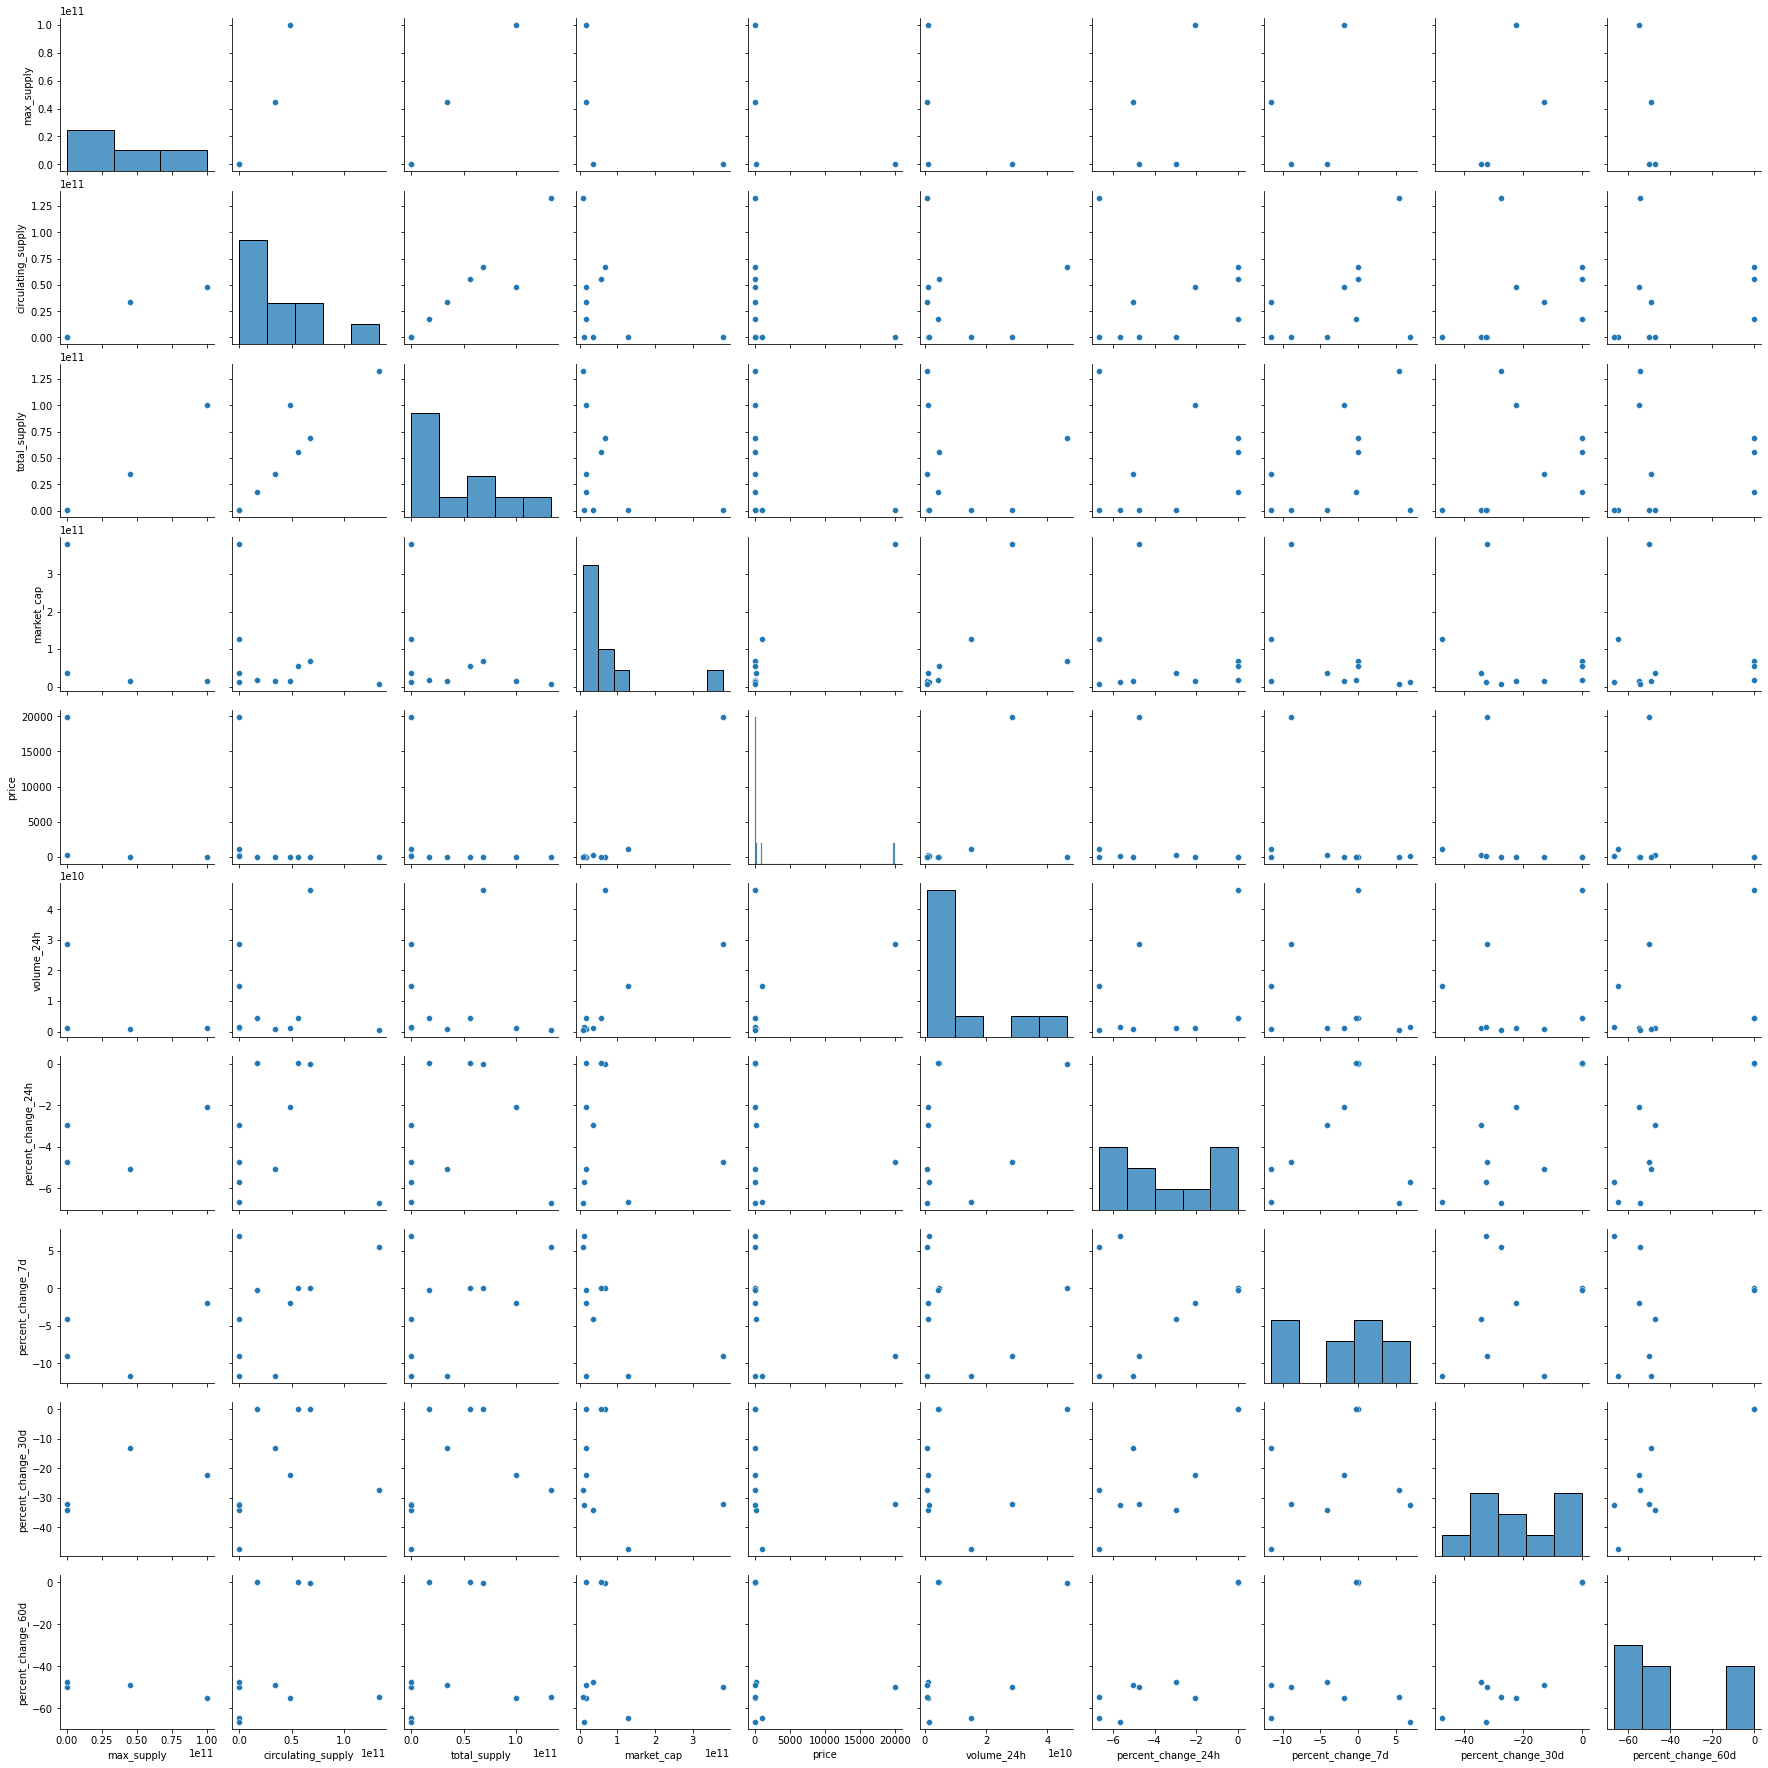

In [13]:
sns.pairplot(df)

<AxesSubplot:xlabel='symbol', ylabel='price'>

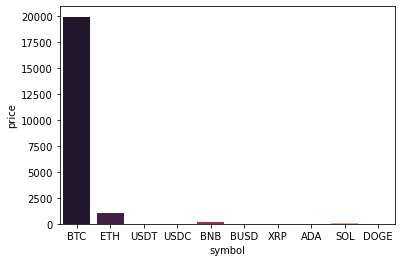

In [14]:
sns.barplot(x="symbol", y="price", palette="rocket", data=df)

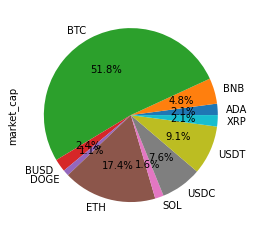

In [15]:
data = df.groupby("symbol")["market_cap"].sum()
data.plot.pie(autopct="%.1f%%");

In [16]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

In [ ]:
sns.barplot(x="symbol", y="market_cap", palette="rocket", data=df)

In [27]:
import plotly.express as px

In [29]:
#data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(df, x='symbol', y='market_cap')
fig.show()